In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


Section 106: Collin Tully, Sahrish Afzal, Eric Cacdac,Rucha Soni

In [ ]:
import pandas as pd

url = 'https://drive.google.com/file/d/1dsDaSXDlpNZTVuPqwQvVrOtaSsdIyrQX/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
print(path)
data1 = pd.read_csv(path)
data1.columns=[col.upper() for col in data1.columns]
#how to get the CSV in here. Upload the CSV to google drive. replace URL with the URL of our project CSV. Make sure it's set to sharing enabled.

https://drive.google.com/uc?export=download&id=1dsDaSXDlpNZTVuPqwQvVrOtaSsdIyrQX


In [ ]:
print(data1.columns)

Index(['YEAR', 'LOCATIONABBR', 'LOCATIONDESC', 'TOPICTYPE', 'TOPICDESC',
       'MEASUREDESC', 'DATASOURCE', 'RESPONSE', 'DATA_VALUE_UNIT',
       'DATA_VALUE_TYPE', 'DATA_VALUE', 'DATA_VALUE_FOOTNOTE_SYMBOL',
       'DATA_VALUE_FOOTNOTE', 'DATA_VALUE_STD_ERR', 'LOW_CONFIDENCE_LIMIT',
       'HIGH_CONFIDENCE_LIMIT', 'SAMPLE_SIZE', 'GENDER', 'RACE', 'AGE',
       'EDUCATION', 'GEOLOCATION', 'TOPICTYPEID', 'TOPICID', 'MEASUREID',
       'STRATIFICATIONID1', 'STRATIFICATIONID2', 'STRATIFICATIONID3',
       'STRATIFICATIONID4', 'SUBMEASUREID', 'DISPLAYORDER'],
      dtype='object')


In [ ]:
data1=pd.Series(['LOCATIONABBR',
 'MEASUREDESC','RESPONSE', 'DATA_VALUE_UNIT',
   'DATA_VALUE_TYPE', 'DATA_VALUE_FOOTNOTE_SYMBOL',
     'DATA_VALUE_FOOTNOTE', 'DATA_VALUE_STD_ERR', 'LOW_CONFIDENCE_LIMIT',
 'HIGH_CONFIDENCE_LIMIT','TOPICTYPEID', 'STRATIFICATIONID2', 'STRATIFICATIONID3',
 'STRATIFICATIONID4', 'SUBMEASUREID','YEAR', 'LOCATIONDESC', 'TOPICTYPE', 'TOPICDESC', 'DATASOURCE', 'DATA_VALUE', 'SAMPLE_SIZE', 'GENDER', 'RACE', 'AGE',
    'EDUCATION', 'GEOLOCATION','TOPICID', 'MEASUREID','DISPLAYORDER'], index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])

In [ ]:
print(data1)

1                   LOCATIONABBR
2                    MEASUREDESC
3                       RESPONSE
4                DATA_VALUE_UNIT
5                DATA_VALUE_TYPE
6     DATA_VALUE_FOOTNOTE_SYMBOL
7            DATA_VALUE_FOOTNOTE
8             DATA_VALUE_STD_ERR
9           LOW_CONFIDENCE_LIMIT
10         HIGH_CONFIDENCE_LIMIT
11                   TOPICTYPEID
12             STRATIFICATIONID2
13             STRATIFICATIONID3
14             STRATIFICATIONID4
15                  SUBMEASUREID
16                          YEAR
17                  LOCATIONDESC
18                     TOPICTYPE
19                     TOPICDESC
20                    DATASOURCE
21                    DATA_VALUE
22                   SAMPLE_SIZE
23                        GENDER
24                          RACE
25                           AGE
26                     EDUCATION
27                   GEOLOCATION
28                       TOPICID
29                     MEASUREID
30                  DISPLAYORDER
dtype: obj

In [ ]:
df = pd.DataFrame(data1)

In [ ]:
#data2=df.drop(df.loc[:, 'LOCATIONABBR':'SUBMEASUREID'].columns, inplace=True)

In [ ]:
data1=df.drop(index=df.index[:15], inplace=True)

In [ ]:
print(data1)

<Axes: >

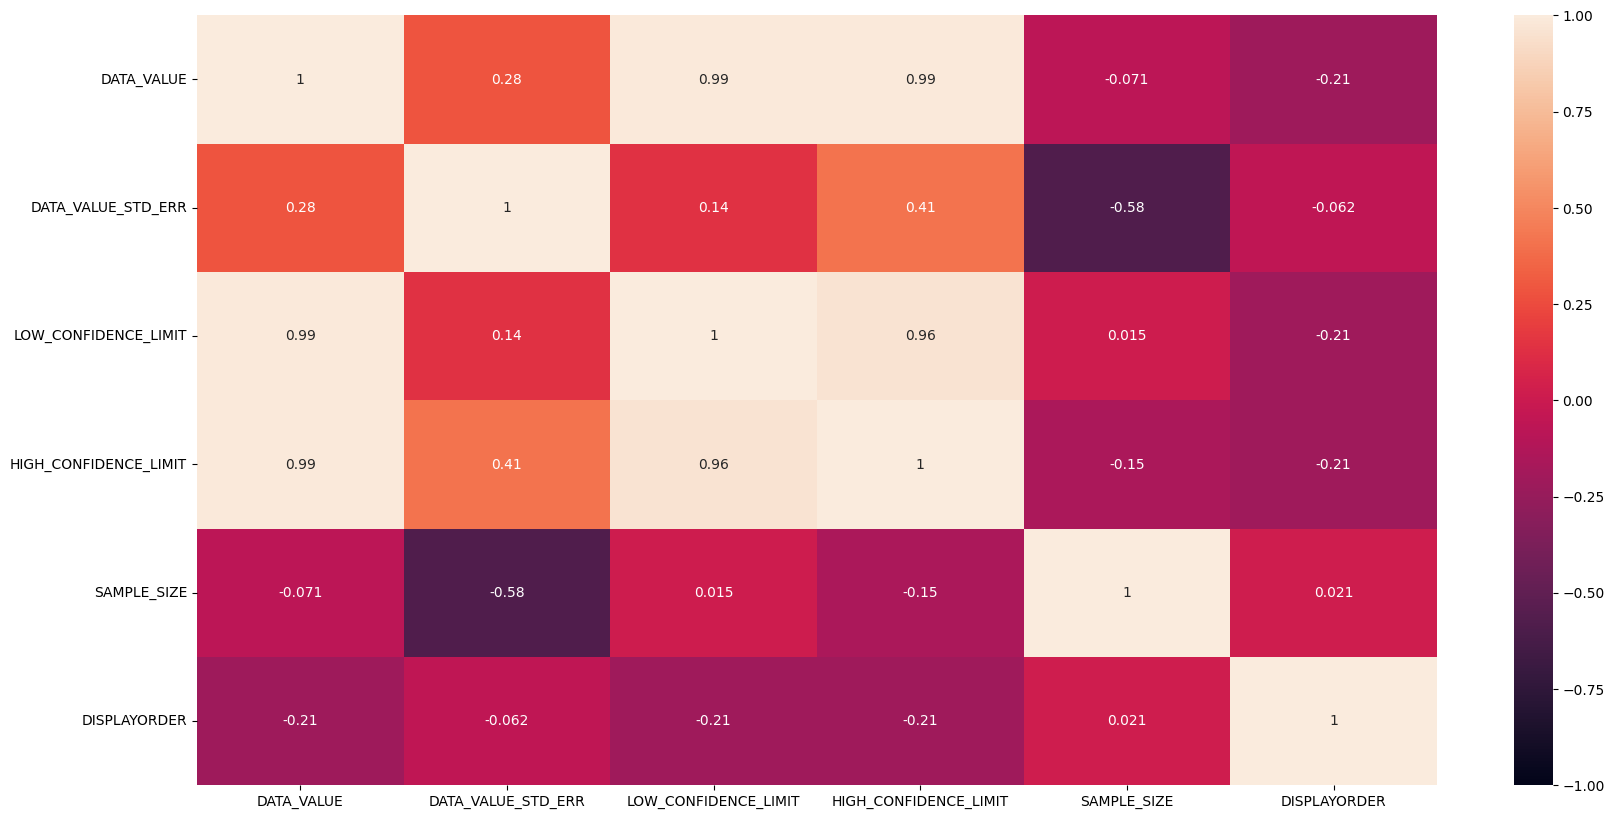

In [ ]:
import matplotlib.colors as clr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
myColors = ("red","white","blue")
cmap1 = clr.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
corr = data1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(20,10))
sns.heatmap(corr,mask = mask, vmin = -1, vmax = 1, annot=True)

In [ ]:
df

,0
16,YEAR
17,LOCATIONDESC
18,TOPICTYPE
19,TOPICDESC
20,DATASOURCE
21,DATA_VALUE
22,SAMPLE_SIZE
23,GENDER
24,RACE
25,AGE


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asian/Pacific Islander'),
  Text(1, 0, 'All Races'),
  Text(2, 0, 'African American'),
  Text(3, 0, 'American Indian/Alaska Native'),
  Text(4, 0, 'White'),
  Text(5, 0, 'Hispanic')])

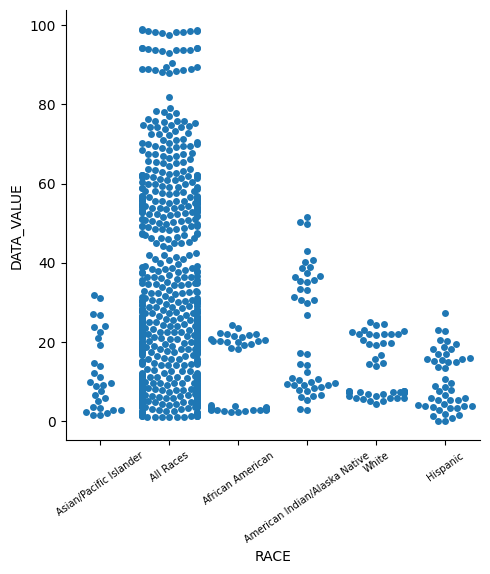

In [ ]:
#tips = sns.load_dataset("tips")
#sns.catplot(data=data1, x="RACE", y="GENDER")
plt.rcParams["figure.figsize"] = (32, 16)
plt.rcParams["xtick.labelsize"] = 7

sns.catplot(data=data1, x="RACE", y="DATA_VALUE",  kind="swarm")
plt.xticks(rotation=35)


<Axes: xlabel='RACE', ylabel='DATA_VALUE'>

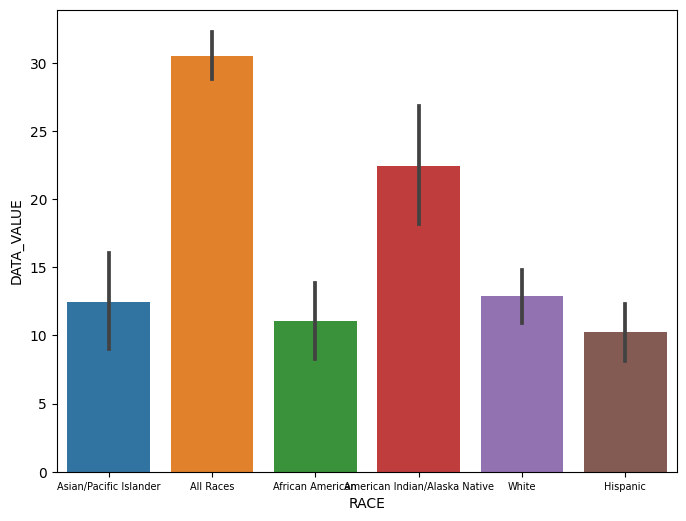

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["xtick.labelsize"] = 7
sns.barplot(x='RACE',y='DATA_VALUE',data=data1) # estimator is mean

<Axes: xlabel='AGE', ylabel='DATA_VALUE'>

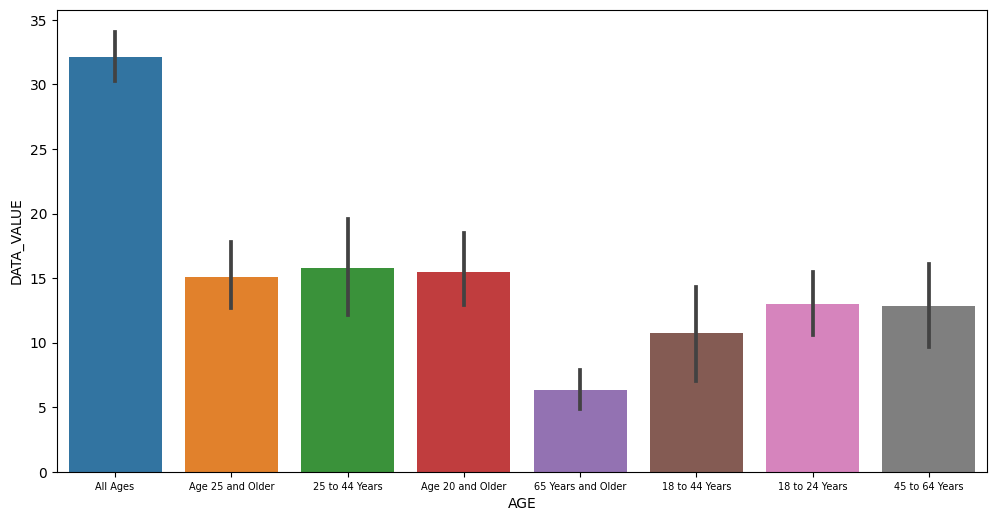

In [ ]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["xtick.labelsize"] = 7
sns.barplot(x='AGE',y='DATA_VALUE',data=data1) # estimator is mean

In [ ]:
#data1.dropna(axis=1,how="any",inplace=True,)

In [ ]:
#For linear regression
from sklearn import linear_model
import pandas as pd
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
#https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

data1.dropna(axis=0,how='any',subset=['DATA_VALUE'],inplace=True)
data1.loc[ data1['GENDER'] == 'Male', 'GENDER'] = 0
data1.loc[ data1['GENDER'] == 'Female', 'GENDER'] = 1
data1.loc[ data1['GENDER'] == 'Overall', 'GENDER'] = 0.5
#if we want to use data values
#data1.drop(data1.loc[data1['GENDER']=='Overall'].index, inplace=True)
data1 = data1.fillna({"Male": 0})
data1 = data1.fillna({"Female": 1})
#X=data1[["race", "age", "locationdesc"]]
#X=data1[["RACE","AGE","LOCATIONDESC"]]
X=data1[["RACE","LOCATIONDESC","AGE","DATA_VALUE"]]
#y=data1["DATA_VALUE"]
y=data1["GENDER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Match pipes to training data
pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                 ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
                 ('model', LinearRegression())])
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
r2=pipe.score(X_train, y_train)

# Making Prediction on Training and Test set
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


#new stuff above
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#lr = linear_model.LinearRegression()
#model=lr.fit(X_train,y_train)
#svc = SVC(random_state=42)
#svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
from sklearn import set_config

set_config(display="diagram")
pipe



0.7282045220632726


Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False)),
                ('model', LinearRegression())])

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#taken from website about VIF 
y, X = dmatrices('GENDER ~ RACE+LOCATIONDESC+AGE+DATA_VALUE', data=data1, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)

                                 variable        VIF
0                               Intercept  63.039294
1                       RACE[T.All Races]   4.655352
2   RACE[T.American Indian/Alaska Native]   1.993132
3          RACE[T.Asian/Pacific Islander]   1.649183
4                        RACE[T.Hispanic]   2.018633
5                           RACE[T.White]   2.040517
6                  LOCATIONDESC[T.Alaska]   1.006983
7                   AGE[T.18 to 44 Years]   1.946569
8                   AGE[T.25 to 44 Years]   1.911454
9                   AGE[T.45 to 64 Years]   1.910976
10              AGE[T.65 Years and Older]   1.913885
11                AGE[T.Age 20 and Older]   3.584818
12                AGE[T.Age 25 and Older]   3.584532
13                        AGE[T.All Ages]   8.405993
14                             DATA_VALUE   1.469572


In [ ]:
#For R2 Evaluation Not Used Here
from sklearn.metrics import r2_score
#predictions = model.predict(X_test)
#r2_score(y_test, predictions)


In [ ]:
#Adjusted R2
#1 - (1-model.score(X_test, y_test))*(len(X_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd



In [ ]:
lr_mae = mean_absolute_error(y_test, y_test_pred)
lr_mse = mean_squared_error(y_test, y_test_pred)

In [ ]:
print("Linear Regression:")
print(f"MAE: {lr_mae:.3f}")
print(f"MSE: {lr_mse:.3f}")


Linear Regression:
MAE: 18792427789.951
MSE: 1370242727873726119936.000


In [ ]:
#We still need another way to evaluate the model. 

Decision Tree

In [ ]:
# decision tree code
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

url = 'https://drive.google.com/file/d/1dsDaSXDlpNZTVuPqwQvVrOtaSsdIyrQX/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data1 = pd.read_csv(path)
data1.columns=[col.upper() for col in data1.columns]

col_names = data1.columns
pima = pd.read_csv(path, header=None, names=col_names)
print(pima)


      YEAR  LOCATIONABBR  LOCATIONDESC                  TOPICTYPE  \
0     year  locationabbr  locationdesc                  topictype   
1     2019            AL       Alabama  Tobacco Use – Survey Data   
2     2019            AL       Alabama  Tobacco Use – Survey Data   
3     2019            AL       Alabama  Tobacco Use – Survey Data   
4     2019            AL       Alabama  Tobacco Use – Survey Data   
...    ...           ...           ...                        ...   
996   2017            AK        Alaska  Tobacco Use – Survey Data   
997   2017            AK        Alaska  Tobacco Use – Survey Data   
998   2017            AK        Alaska  Tobacco Use – Survey Data   
999   2017            AK        Alaska  Tobacco Use – Survey Data   
1000  2017            AK        Alaska  Tobacco Use – Survey Data   

                           TOPICDESC  \
0                          topicdesc   
1     Smokeless Tobacco Use (Adults)   
2     Smokeless Tobacco Use (Adults)   
3          

In [ ]:
# assigning all values to a numerical value
data1.dropna(axis=0,how='any',subset=['DATA_VALUE'],inplace=True)
data1.loc[data1['GENDER'] == 'Overall', 'GENDER'] = 0
data1.loc[data1['GENDER'] == 'Male', 'GENDER'] = 1
data1.loc[data1['GENDER'] == 'Female', 'GENDER'] = 2
#data1.drop(data1.loc[data1['GENDER']=='Overall','GENDER'].index, inplace=True)

data1.loc[data1['RACE'] == 'All Races', 'RACE'] = 0
data1.loc[data1['RACE'] == 'Asian/Pacific Islander', 'RACE'] = 1
data1.loc[data1['RACE'] == 'American Indian/Alaska Native', 'RACE'] = 2
data1.loc[data1['RACE'] == 'African American', 'RACE'] = 3
data1.loc[data1['RACE'] == 'White', 'RACE'] = 4
data1.loc[data1['RACE'] == 'Hispanic', 'RACE'] = 5

data1.loc[data1['LOCATIONDESC'] == 'Alabama', 'LOCATIONDESC'] = 0
data1.loc[data1['LOCATIONDESC'] == 'Alaska', 'LOCATIONDESC'] = 1

data1.loc[data1['AGE'] == 'All Ages', 'AGE'] = 0
data1.loc[data1['AGE'] == '18 to 24 Years', 'AGE'] = 1
data1.loc[data1['AGE'] == '18 to 44 Years', 'AGE'] = 2
data1.loc[data1['AGE'] == 'Age 20 and Older', 'AGE'] = 3
data1.loc[data1['AGE'] == 'Age 25 and Older', 'AGE'] = 4
data1.loc[data1['AGE'] == '25 to 44 Years', 'AGE'] = 5
data1.loc[data1['AGE'] == '45 to 64 Years', 'AGE'] = 6 
data1.loc[data1['AGE'] == '65 Years and Older', 'AGE'] = 7

pima = data1.fillna({})


In [ ]:
# choose which features of the dataset to implement (into feature_cols), put them all under a variable X and specify a target variable Y
feature_cols = ["RACE","LOCATIONDESC","AGE","DATA_VALUE"]
X = pima[feature_cols] # puts specified features into a table
y = pima.GENDER # Target variable
y=y.astype('int')

In [ ]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,RACE,LOCATIONDESC,AGE,DATA_VALUE
436,0,0,0,27.3
750,0,0,0,21.0
236,0,0,2,21.9
585,0,0,3,7.6
724,1,0,0,19.2
...,...,...,...,...
111,2,0,0,2.8
279,3,0,0,19.9
888,0,1,0,94.2
448,0,0,0,59.9


In [ ]:
y_train

436    2
750    2
236    2
585    0
724    0
      ..
111    0
279    0
888    0
448    2
107    2
Name: GENDER, Length: 676, dtype: int64

In [ ]:
# creating a tree model and training it
clf = DecisionTreeClassifier(criterion='gini', max_depth=10)
model = clf.fit(X_train,y_train) 
y_pred = model.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # model accuracy


Accuracy: 0.7422680412371134


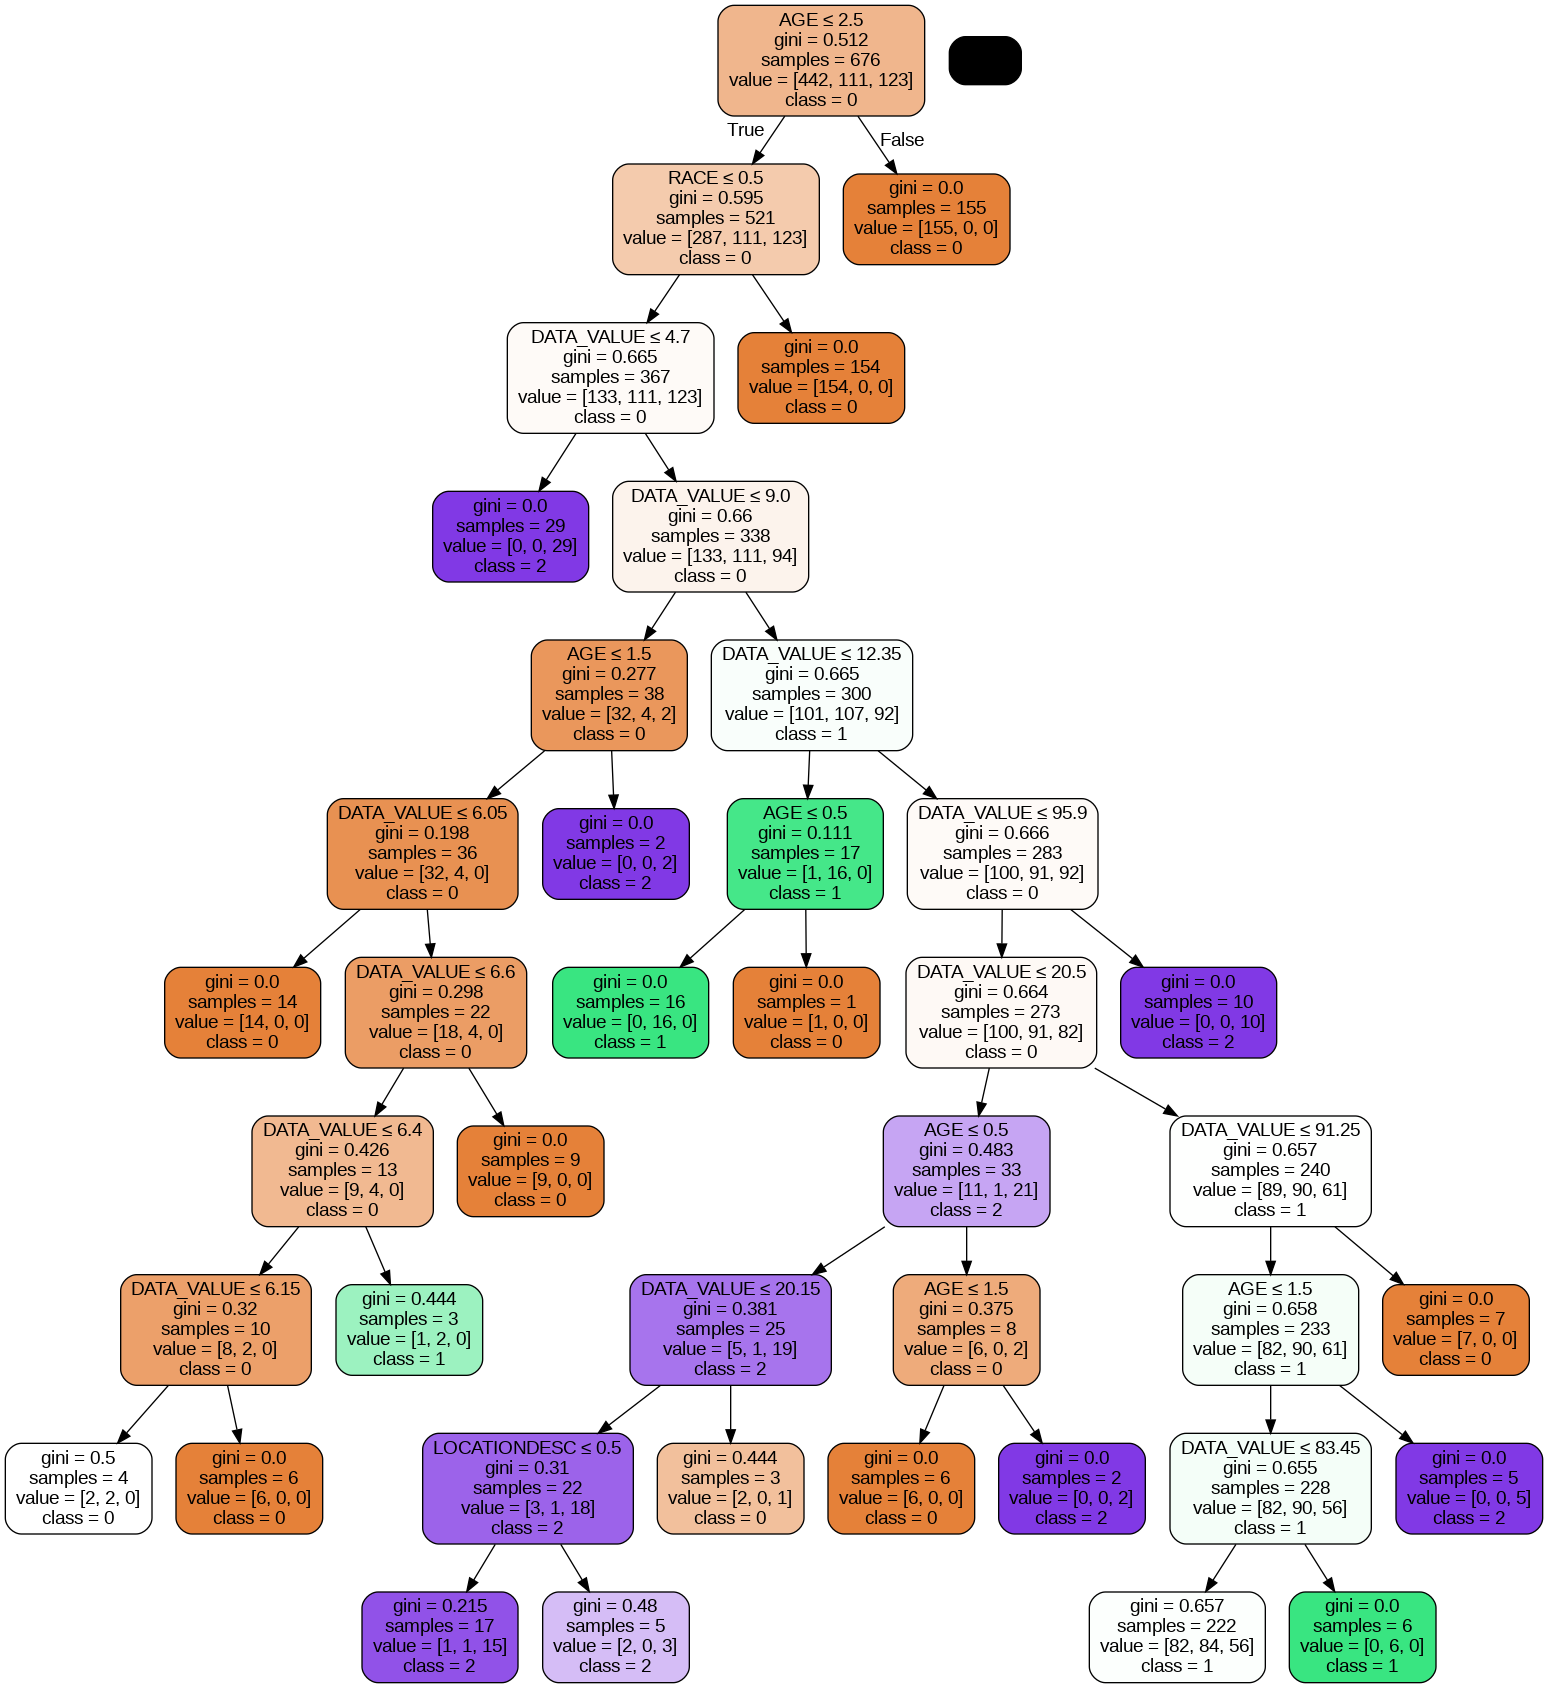

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cig.png')
Image(graph.create_png())

In [ ]:
#finding MAE, MSE, and R^2 for dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

In [ ]:
print("Decision Tree:")
print(f"MAE: {dt_mae:.3f}")
print(f"MSE: {dt_mse:.3f}")
print(f"R^2: {dt_r2:.3f}")

Decision Tree:
MAE: 0.282
MSE: 0.330
R^2: 0.482


In [ ]:
print("Linear Regression:")
print(f"MAE: {lr_mae:.3f}")
print(f"MSE: {lr_mse:.3f}")
print(f"R^2: {lr_r2:.3f}")